**Analysing Amazon Sales Data**

**1. Objective**
1. Identify sales trends on a monthly, yearly, and yearly-monthly basis to reduce costs and increase profits.
2. Find key metrics and factors and show the meaningful relationships between
attributes

**2. Data Preparation**


The Amazon sales data set contains information on the region and country of the sale, item type, sales channel, order priority and date, order ID, ship date, units sold, unit price, unit cost, total revenue, total cost, and total profit. This data set can be used to analyze sales patterns and trends for Amazon products, as well as to identify opportunities to improve distribution, reduce costs, and increase profitability.


**Importing the libraries**

In [110]:
# Importing required libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

**3. Data Processing**

In [111]:
# Reading the dataset

sales_data = pd.read_csv('Amazon Sales data.csv')
sales_data.head(20)


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,02-04-2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [112]:
# Creating fuction for see overview of all data and all infor at once

def overview_dataset(dataset):
    return dataset.shape, dataset.columns, dataset.info(), dataset.describe(), dataset.isna().sum()

In [113]:
overview_dataset(sales_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


((100, 14),
 Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
        'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
        'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
       dtype='object'),
 None,
            Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
 count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
 mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
 std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
 min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
 25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
 50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
 75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
 max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   
 
          Total Cost  Total Profit  
 count  1.000

In [114]:
# Returns shape of the dataset
sales_data.shape
print(f"Our Data set contains {sales_data.shape[0]} rows and {sales_data.shape[1]} columns")

Our Data set contains 100 rows and 14 columns


In [115]:
# Returns the column names of the dataset
for i in sales_data.columns:
    print(i)


Region
Country
Item Type
Sales Channel
Order Priority
Order Date
Order ID
Ship Date
Units Sold
Unit Price
Unit Cost
Total Revenue
Total Cost
Total Profit


**3.1 Data overview Insight**

1. Here we found that Order date and Ship Date column dataframe are in object datatype So we have to convert it to Datetime datatype
2. It is founded that there are no negative values present in the given dataset
3. It is found that there are no null values present in the given dataset
4. It is founded that the given dataset contains 100 rows and 14 columns

#### 3.2 Converting date format

In [116]:
# Converting object type to datetime fromat
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

**3.3 Spilling month, year and monthly_year from Order Date and Ship Date columns**

In [117]:

sales_data.insert(loc=7, column='Order_Year', value=sales_data['Order Date'].dt.year)
sales_data.insert(loc=8, column='Order_Month', value=sales_data['Order Date'].dt.month)
sales_data.insert(loc = 9, column = 'Order_Month_Name', value=pd.to_datetime(sales_data['Order Date']).dt.strftime('%B'))
sales_data.insert(loc=10, column='Order_Yearly_Month', value=sales_data['Order Date'].dt.to_period('M'))
sales_data.insert(loc=11, column='Ship_Year', value=sales_data['Ship Date'].dt.year)
sales_data.insert(loc=12, column='Ship_Month', value=sales_data['Ship Date'].dt.month)
# sales_data.insert(loc = 13, column = 'Ship Month Name', value=pd.to_datetime(sales_data['Ship Date']).dt.strftime('%B'))
sales_data.insert(loc=14, column='Ship_Yearly_Month', value=sales_data['Ship Date'].dt.to_period('M'))
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Order_Year,Order_Month,Order_Month_Name,...,Ship_Year,Ship_Month,Ship Date,Ship_Yearly_Month,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010,5,May,...,2010,6,2010-06-27,2010-06,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012,8,August,...,2012,9,2012-09-15,2012-09,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014,5,May,...,2014,5,2014-05-08,2014-05,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014,6,June,...,2014,7,2014-07-05,2014-07,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013,2,February,...,2013,2,2013-02-06,2013-02,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [118]:
print(list(sales_data.columns))
sales_data.columns = sales_data.columns.str.strip()

# Removing Unnecessary Columns
sales_data = sales_data[['Region','Country','Order_Month', 'Order_Month_Name','Item Type', 'Sales Channel', 'Order Priority', 'Order_Year', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']]
sales_data.head()


['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Order_Year', 'Order_Month', 'Order_Month_Name', 'Order_Yearly_Month', 'Ship_Year', 'Ship_Month', 'Ship Date', 'Ship_Yearly_Month', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']


,Region,Country,Order_Month,Order_Month_Name,Item Type,Sales Channel,Order Priority,Order_Year,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,5,May,Baby Food,Offline,H,2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,8,August,Cereal,Online,C,2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,5,May,Office Supplies,Offline,L,2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,6,June,Fruits,Online,C,2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,2,February,Office Supplies,Offline,L,2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [119]:
# Returns all the columns of the dataframe

displayColumns(sales_data)

,Columns
0,Region
1,Country
2,Order_Month
3,Order_Month_Name
4,Item Type
5,Sales Channel
6,Order Priority
7,Order_Year
8,Units Sold
9,Unit Price


#### 3.4 New dataframe Shape

In [120]:
# Returns shape of the dataset

rows,column = sales_data.shape
print(f"Our Data set contains {rows} rows and {column} columns")

Our Data set contains 100 rows and 14 columns


In [178]:
sales_data.corr()

<ipython-input-178-4f52a22a580c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_data.corr()


,Order_Month,Order_Year,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order_Month,1.000000,-0.106715,-0.007995,-0.031917,-0.042016,0.003835,-0.015617,0.051366
Order_Year,-0.106715,1.000000,0.012455,-0.061791,-0.071567,-0.037128,-0.050899,0.002196
Units Sold,-0.007995,0.012455,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.031917,-0.061791,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.042016,-0.071567,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.003835,-0.037128,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,-0.015617,-0.050899,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.051366,0.002196,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


As we see unit cost is highly correlated to unit price this signifies that we need to reduce cost and increase unit price to gain profit in future

From above correlation we conclude that total Revenue will increase if we increase the unit price as they high correlation of 0.75

Total profit will also rise by increasing sales and unit Price as they  correlation is 0.56 and 0.56




**Summarized Processing tasks**
Here are the some steps we have taken for cleaning and manipulation of data**
1. Converted Date format from object to date.
2. The "Order Date" is splited into 'Order Year_', 'Order Month_',  'Order Month Name', ''Order Yearly Month_''.
3. The "Ship Date" is splited into 'Ship Year_', 'Ship Month_', 'Ship Month Name', 'Ship Yearly Month_'.
4. Some Uneccasary columns have been removed :


**Order Date**,
**Order Month_**,
**Order Yearly month_**,
**Ship Year_**,
**Ship Yearly Month_**,
**Ship Date**.

* There are 13 columns after processing.

**4. Analyzing and Visualizing**

### <p style="text-align:center;">~ Here are the some Insights we have got after analyzing and visualizing on PowerBI ~</p>

4.1 Total Yearly Profit by Sales Channel

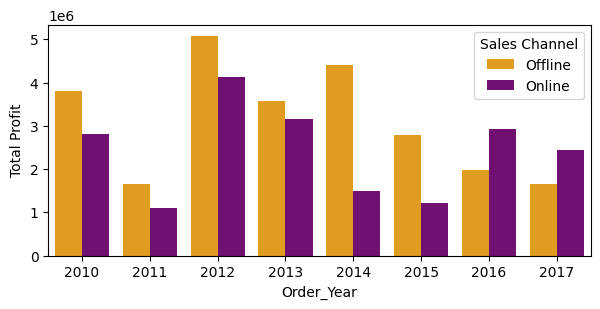

In [171]:
import seaborn as sns
plt.figure(figsize=(7, 3))
grouped_data = sales_data.groupby(['Order_Year', 'Sales Channel'])['Total Profit'].sum().reset_index()

# Define the color palette for 'Sales Channel'
palette = {'Online': 'Purple', 'Offline': 'Orange'}

# Create the bar plot
sns.barplot(x='Order_Year', y='Total Profit', hue='Sales Channel', data=grouped_data, palette=palette);

4.2 Total Yearly Revenue by Sales Channel

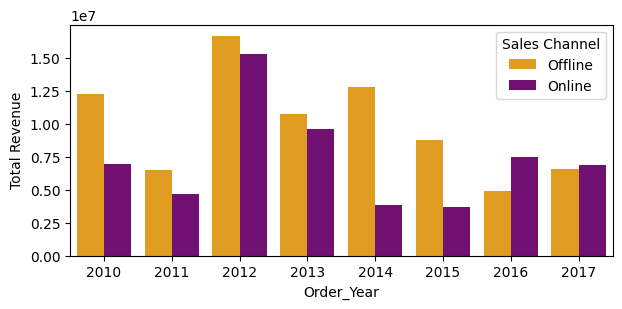

In [172]:
import seaborn as sns
plt.figure(figsize=(7, 3))
grouped_data = sales_data.groupby(['Order_Year', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Define the color palette for 'Sales Channel'
palette = {'Online': 'Purple', 'Offline': 'Orange'}

# Create the bar plot
sns.barplot(x='Order_Year', y='Total Revenue', hue='Sales Channel', data=grouped_data, palette=palette)
plt.show()

4.3 Total Yearly Revenue by Sales Channel

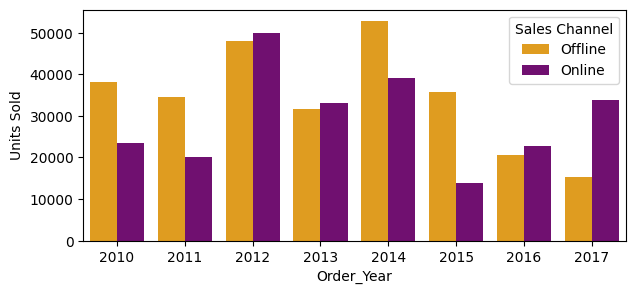

In [174]:
plt.figure(figsize=(7, 3))
grouped_data = sales_data.groupby(['Order_Year', 'Sales Channel'])['Units Sold'].sum().reset_index()

# Define the color palette for 'Sales Channel'
palette = {'Online': 'Purple', 'Offline': 'Orange'}
# Create the bar plot
sns.barplot(x='Order_Year', y='Units Sold', hue='Sales Channel', data=grouped_data, palette=palette)
plt.show()

   **~ Insights**

* The majority of our profit, sales and revenue come from our offline channel.


* "Our highest revenue and profit year was in **2012**, with a total revenue of (**135.2**) million dollar and a profit of (**$9.2**) million."


* From **2010** to **2012**, we experienced an increase in revenue, sales and profit. However, from **2015** to **2017**, we experienced a decline in these metrics.

4.4 Profit by Region (2010-17)

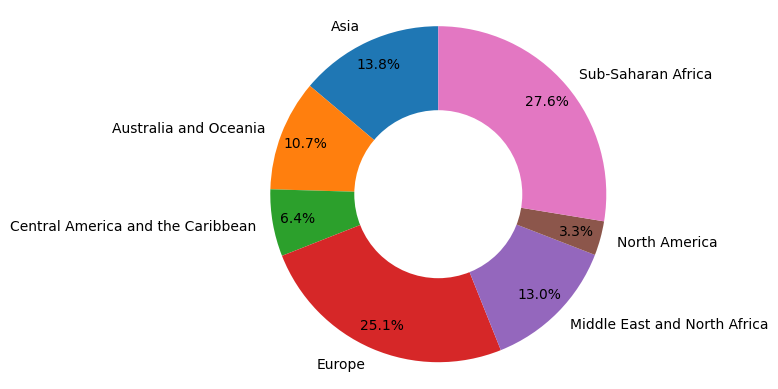

In [124]:
grouped_data = sales_data.groupby(['Region'])['Total Profit'].sum().reset_index()

# Calculate the total profit
total_profit = grouped_data['Total Profit'].sum()

# Calculate the percentage
grouped_data['Percentage'] = grouped_data['Total Profit'] / total_profit * 100

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(grouped_data['Percentage'], labels = grouped_data['Region'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a white circle at the center
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

4.5 Revenue by Region (2010-17)

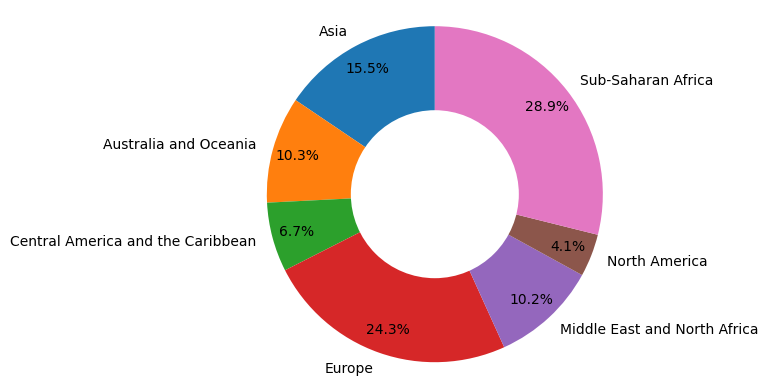

In [125]:
grouped_data = sales_data.groupby(['Region'])['Total Revenue'].sum().reset_index()

# Calculate the total profit
total_profit = grouped_data['Total Revenue'].sum()

# Calculate the percentage
grouped_data['Percentage'] = grouped_data['Total Revenue'] / total_profit * 100

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(grouped_data['Percentage'], labels = grouped_data['Region'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a white circle at the center
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

4.6 Sales by Region (2010-17)

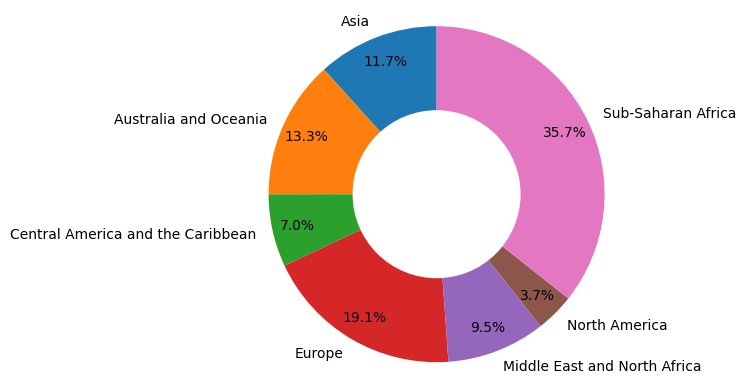

In [126]:
grouped_data = sales_data.groupby(['Region'])['Units Sold'].sum().reset_index()

# Calculate the total profit
total_profit = grouped_data['Units Sold'].sum()

# Calculate the percentage
grouped_data['Percentage'] = grouped_data['Units Sold'] / total_profit * 100

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(grouped_data['Percentage'], labels = grouped_data['Region'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a white circle at the center
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

**~ Insights**

* The **Sub-Saharan Africa** region was the most sales, profitable, and revenue generated region, contributing:

**35.6%**  in total sales

**27.58%** in total profit

**28.88%** in total revenue

* The second most sales, profitable, and revenue generated region was Europe, which contributed:

**19.13%** in total sales

**25.09%** in total profit (fairly close to Sub-Saharan Africa)

**24.3%** in total revenue.

* **Europe** is the most Profitable region in terms of its sales.


4.7 Total Monthly Profit by Sales Channels

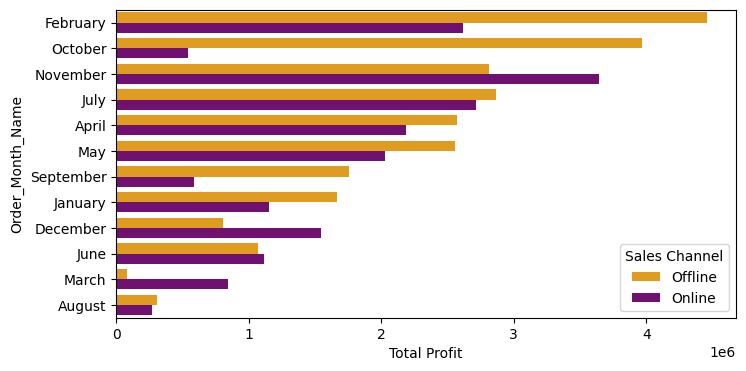

In [142]:
plt.figure(figsize=(8, 4))
grouped_data = sales_data.groupby(['Order_Month_Name', 'Sales Channel'])['Total Profit'].sum().reset_index()

# Sort the data by 'Order_Month_Name'
grouped_data = grouped_data.sort_values('Total Profit',ascending=False)

# Define the color palette for 'Sales Channel'
palette = {'Online': 'Purple', 'Offline': 'Orange'}

# Create the bar plot
sns.barplot(x='Total Profit', y='Order_Month_Name', hue='Sales Channel', data=grouped_data, palette=palette)
plt.show()

4.8 Total Monthly Revenue by Sales Channels

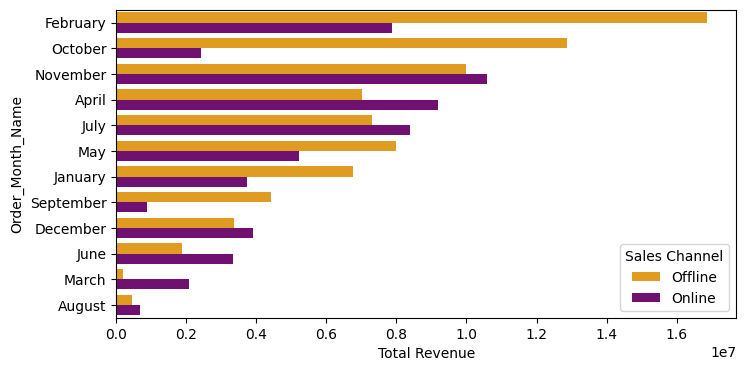

In [139]:

plt.figure(figsize=(8, 4))
grouped_data = sales_data.groupby(['Order_Month_Name', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by 'Order_Month_Name'
grouped_data = grouped_data.sort_values('Total Revenue',ascending=False)

# Define the color palette for 'Sales Channel'
palette = {'Online': 'Purple', 'Offline': 'Orange'}

# Create the bar plot
sns.barplot(x='Total Revenue', y='Order_Month_Name', hue='Sales Channel', data=grouped_data, palette=palette)
plt.show()

4.9 Total Monthly Sales by Sales Channels

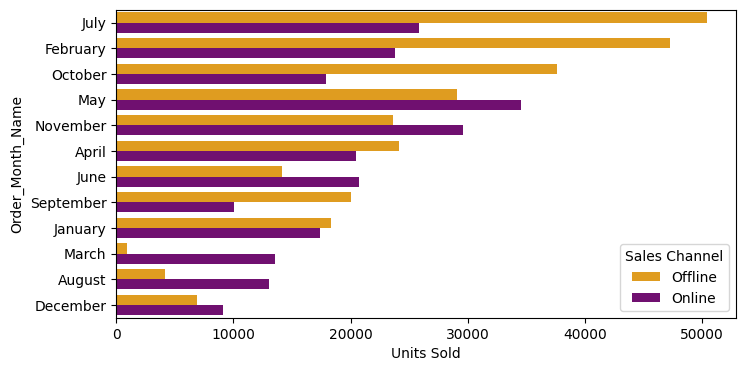

In [140]:
plt.figure(figsize=(8, 4))
grouped_data = sales_data.groupby(['Order_Month_Name', 'Sales Channel'])['Units Sold'].sum().reset_index()

# Sort the data by 'Order_Month_Name'
grouped_data = grouped_data.sort_values('Units Sold',ascending=False)

# Define the color palette for 'Sales Channel'
palette = {'Online': 'Purple', 'Offline': 'Orange'}

# Create the bar plot
sns.barplot(x='Units Sold', y='Order_Month_Name', hue='Sales Channel', data=grouped_data, palette=palette)
plt.show()

**~ Insights**

* **February** ,**October**and **November** were the most profitable and revenue generated months.


* Although most of our profit, sales, and revenue come from offline channels, there are some months when users tend to purchase more online than offline. These months include **June**, **December**, and **November.**

**4.10 Top 5 Most Profitable Product Segments and their Region (2010-17)**

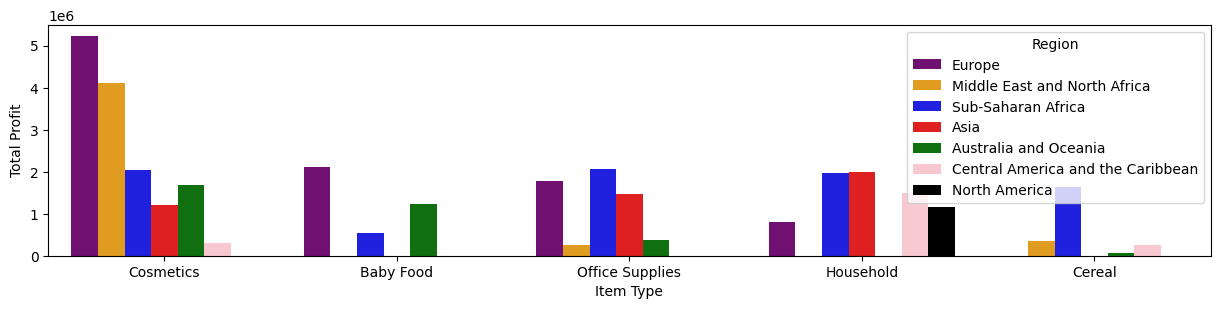

In [163]:
plt.figure(figsize=(15, 3))
grouped_data = sales_data.groupby(['Item Type', 'Region'])['Total Profit'].sum().reset_index()
grouped_data = grouped_data.sort_values('Total Profit', ascending=False)

# Get the top 5 'Item Type' in terms of 'Total Profit'
top_item_types = grouped_data['Item Type'].unique()[:5]

# Filter the data to include only the top 5 'Item Type'
grouped_data = grouped_data[grouped_data['Item Type'].isin(top_item_types)]
palette = {'Europe': 'Purple', 'Middle East and North Africa' : 'Orange','sub-Saharan Africa':'yellow','Central America and the Caribbean': 'pink', 'Asia':'Red', 'Sub-Saharan Africa':'Blue', 'Australia and Oceania':'Green', 'North America':'Black'}

# Create the bar plot
sns.barplot(x='Item Type', y='Total Profit', hue='Region', data=grouped_data, palette=palette)

plt.show()

**~ Insights**
* Our top 5 most profitable product segments were Cosmetic, Household, Office Supplies, Cereal, and Baby Food.


* **Cosmetics** was the most profitable product segment, with its highest Profit generated in **Europe**, followed by the **Middle East and North Africa**


* **Europe** was the most profitable region for us because it purchased our highest profit margin products, such as cosmetics, office supplies, and baby food.




**5. Conclusion**

* Our highest revenue and profit year was in 2012, but we experienced a decline from 2014-2017.

* Most of our profit, revenue, and sales come from offline channels.

* The Sub-Saharan Africa region was the most profitable and revenue generated region, followed by Europe.

* Cosmetics, Household, Office Supplies, Cereal, and Baby Food were our top 5 most profitable product segments.

* Europe was the most profitable region for us, due to high sales of cosmetics, office supplies, and baby food.

* February and November were the most profitable and revenue generated months.

* Online channels performed well in June, December, and November.

**6. Recommendations**

* We should find the reasons behind this decline after 2014 and take necessary steps in order to improve our Revenue, Sales and Profit.


* We should focus on optimizing our offline channel as it contributes the most to our profit, revenue, and sales.


* We should invest more in Sub-Saharan and European Region as it was our most revenue and profit generated regions.


* We should promote and expand in cosmetics, office supplies and baby food especially in Europe in order to gain more profit.


* We should give more discount offers, free home delivery and other offers to capture online market in the month of June, December and November.
